# Rain in Australia

In [37]:
#Importing libraries

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [38]:
#Loading data
data = pd.read_csv('rain-in-australia/weatherAUS.csv')
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


# Counting rows and columns

In [39]:
'Rows: {} | Columns: {}'.format(data.shape[0], data.shape[1])

'Rows: 142193 | Columns: 24'

# Checking NaN values

In [40]:
#Checking the target

rain_tomorrow = list(data.RainTomorrow)

nan = 0

for i in rain_tomorrow:
    if not (i=='Yes' or i=='No'):
        nan += 1

print(nan)

0


In [41]:
evaporation = list(data.Evaporation)

nan = 0

for i in evaporation:
    if not (i=='Yes' or i=='No'):
        nan += 1

print(nan)

142193


In [42]:
sunshine = list(data.Sunshine)

for i in sunshine:
    if not (i=='Yes' or i=='No'):
        nan += 1

print(nan)

284386


# Removing NaN values

In [43]:
data = data.dropna()
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0.0,No
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0.0,No
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0.0,No
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0.0,No
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,0.0,No


In [44]:
'Rows: {} | Columns: {}'.format(data.shape[0], data.shape[1])

'Rows: 56420 | Columns: 24'

# Dealing with categorical variables

In [45]:
print('Rain tomorrow:')
data.RainTomorrow.unique()

Rain tomorrow:


array(['No', 'Yes'], dtype=object)

In [46]:
print('Rain today:')
data.RainToday.unique()

Rain today:


array(['No', 'Yes'], dtype=object)

In [47]:
print('Wind gust direction:')
data.WindGustDir.unique()

Wind gust direction:


array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [48]:
print('Wind direction at 9 a. m.:')
data.WindDir9am.unique()

Wind direction at 9 a. m.:


array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [49]:
label_encoder = LabelEncoder()

data.RainTomorrow = label_encoder.fit_transform(data.RainTomorrow)
data.RainToday = label_encoder.fit_transform(data.RainToday)
data.WindGustDir = label_encoder.fit_transform(data.WindGustDir)
data.WindDir9am = label_encoder.fit_transform(data.WindDir9am)

data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,3,43.0,3,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0.0,0
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,11,41.0,8,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0.0,0
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,9,37.0,9,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0.0,0
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,1,48.0,1,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0.0,0
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,4,41.0,5,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,0,0.0,0


In [50]:
rain_tomorrow = list(data.RainTomorrow)

yes, no = 0, 0

for i in rain_tomorrow:
    if (i==1):
        yes += 1
    else:
        no +=1

print('Yes: ' + str(yes))
print('No: ' + str(no))

Yes: 12427
No: 43993


# Checking correlations between attributes

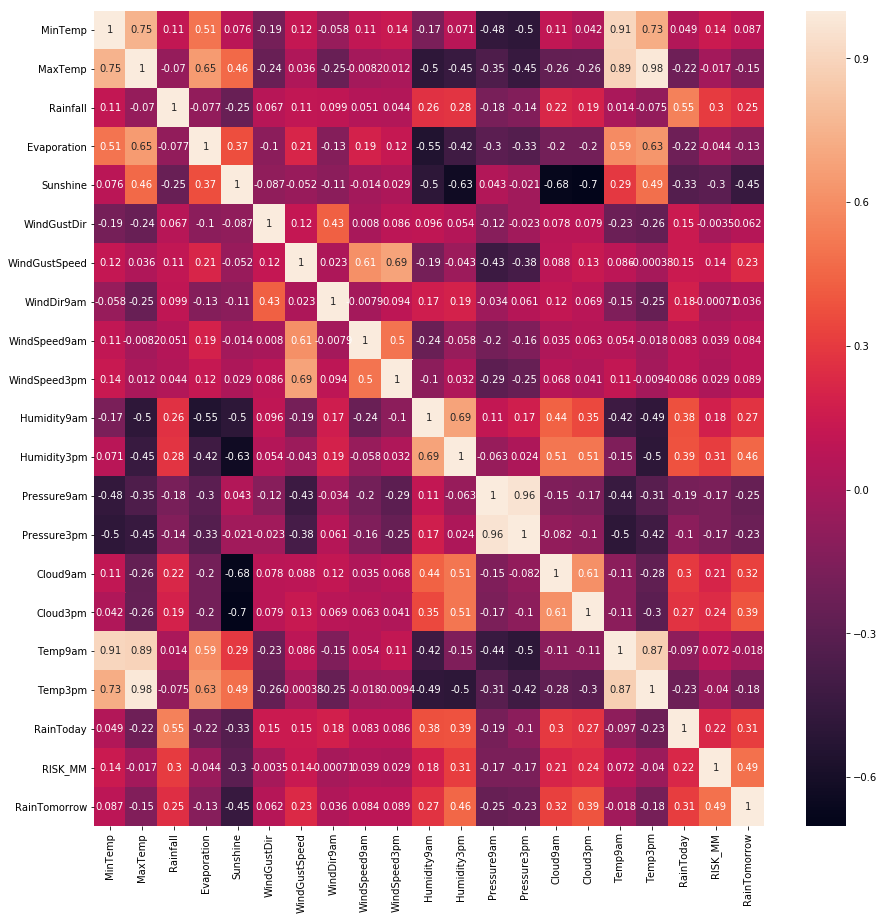

In [51]:
fig, tam = plt.subplots(figsize=(15,15))

correlation = data.corr()

sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    ax=tam, annot=True
)

# Working with kNN

In [52]:
#Using kNN with k = 3 and 20% dataset for training

X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = data[['RainTomorrow']]

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=.2)

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

error = 0
for case, prediction in zip(Y_test, predictions):
    #print(case, prediction)
    error += abs(case - prediction)

print('Erro Absoluto Médio:',(error / len(predictions)))

Erro Absoluto Médio: [0.25788727]


In [53]:
#Using kNN with k = 5 and 20% dataset for training

X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = data[['RainTomorrow']]

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=.2)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

error = 0
for case, prediction in zip(Y_test, predictions):
    #print(case, prediction)
    error += abs(case - prediction)

print('Erro Absoluto Médio:',(error / len(predictions)))

Erro Absoluto Médio: [0.25730238]


In [54]:
#Using kNN with k = 7 and 20% dataset for training

X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = data[['RainTomorrow']]

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=.2)

knn = KNeighborsRegressor(n_neighbors=7)

knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

error = 0
for case, prediction in zip(Y_test, predictions):
    #print(case, prediction)
    error += abs(case - prediction)

print('Erro Absoluto Médio:',(error / len(predictions)))

Erro Absoluto Médio: [0.26234365]


# Now, Decision Tree

In [55]:
X = data.loc[:, ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = data.loc[:, ['RainTomorrow']]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [56]:
#Using depth = 5 and leafs = 3

clf_entropy = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 100,
    max_depth=5, #profundidade da árvore
    min_samples_leaf=3 
)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [57]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
print ("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  79.23608649415101


In [59]:
#Using depth = 6 and leafs = 3

clf_entropy = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 100,
    max_depth=6, #profundidade da árvore
    min_samples_leaf=3 
)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [60]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
print ("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  79.69691598723857


In [62]:
#Using depth = 7 and leafs = 3

clf_entropy = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 100,
    max_depth=7, #profundidade da árvore
    min_samples_leaf=3 
)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [63]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
print ("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  79.69691598723857
